1. Датасет об использовании смартфонов. Датасет был взят с сайта www.kaggle.com. 
   Этот набор данных дает представление о ежедневном использовании мобильных устройств 1000 пользователей, охватывая такие аспекты, как время использования экрана, использование приложений и вовлеченность пользователей в различных категориях приложений.
   Он включает в себя разнообразный спектр пользователей по возрасту, полу и местоположению.
   Данные фокусируются на общем использовании приложений, времени, проведенном в социальных сетях, приложениях для повышения производительности и игровых приложениях, а также на общем времени использования экрана.
   Этот набор данных полезен для анализа мобильного взаимодействия, привычек использования приложений и влияния демографических факторов на мобильное поведение. Он может помочь определить тенденции для маркетинга, разработки приложений и оптимизации пользовательского опыта.
2. В датасете представлены следующие атрибуты:
- User_ID - уникальный идентификатор для каждого пользователя (ключевой атрибут) (числовой тип) 
- Age - возраст пользователя от 18 до 60 лет (числовой тип)
- Gender - Пол пользователя (строковый тип)
- Total_App_Usage_Hours - общее количество часов, проведенных в мобильных приложениях за день (числовой тип)
- Daily_Screen_Time_Hours - общее время, проведенное перед экраном, включая все действия, в часах (числовой тип)
- Number_of_Apps_Used - количество различных приложений, используемых пользователем за день (числовой тип)
- Social_Media_Usage_Hours - количество часов, посвященное приложениям социальных сетей (числовой тип)
- Productivity_App_Usage_Hours - количество часов, посвященныое приложениям для повышения производительности (числовой тип)
- Gaming_App_Usage_Hours - количество часов, посвященное игровым приложениям (числовой тип)
- Location - город или регион, где проживает пользователь (строковый тип)

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mobile_usage_behavioral_analysis.csv", index_col=["User_ID"])
df.head()

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
User_ID,,,,,,,,,
1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [308]:
#Функция нахождение выбросов через квартиили
def FindOutliers(arr):
    sortArr = np.sort(arr)
    q1 = np.ceil(0.25 * len(sortArr))
    q3 = np.ceil(0.75 * len(sortArr))
    qRange = sortArr[int(q3)] - sortArr[int(q1)] 
    lowBorder = sortArr[int(q1)] - 1.5 * qRange
    upBorder = sortArr[int(q3)] + 1.5 * qRange
    outliers = []
    i = 0
    while sortArr[i] < lowBorder:
        outliers.append(sortArr[i])
        i += 1
    i = len(sortArr) - 1
    while sortArr[i] > upBorder:
        outliers.append(sortArr[i])
        i -= 1
    return outliers

Возраст пользователей:
Среднее значение: 38.745
СКО: 12.180639351035724
Количество пропущенных значений: 0
Выбросы: []


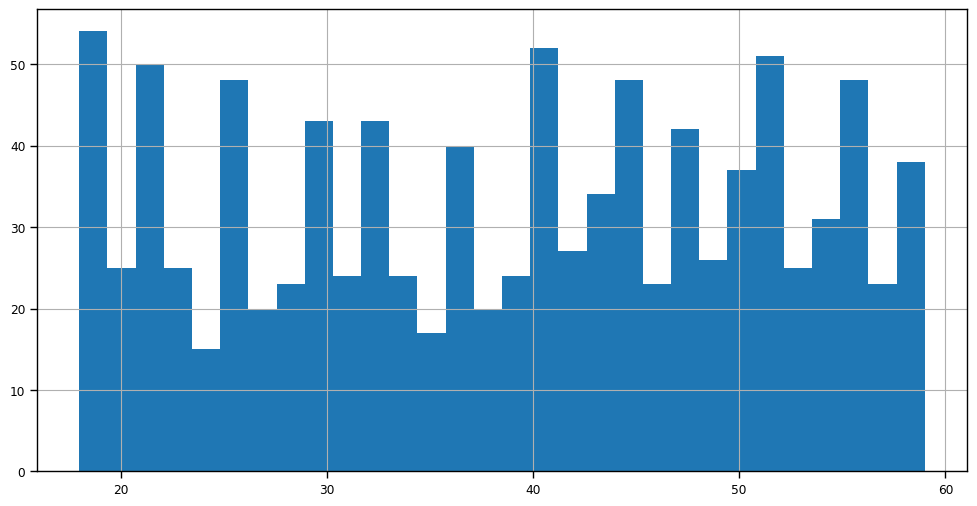

In [310]:
#Возраст пользователей
age = np.array(df['Age'])
print('Возраст пользователей:')
print('Среднее значение: ' + str(age.mean()))
print('СКО: ' + str(age.std()))
print('Количество пропущенных значений: ' + str(df['Age'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(age)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Age'], bins = 30)
axes.grid()

Общее количество часов, проведенных в мобильных приложениях за день:
Среднее значение: 6.40567
СКО: 3.1332874670384143
Количество пропущенных значений: 0
Выбросы: []


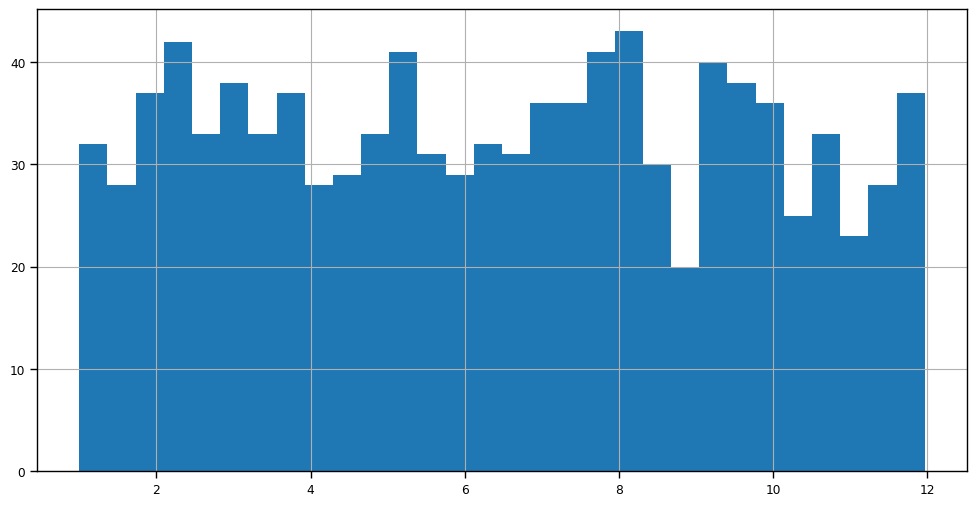

In [312]:
#Общее количество часов, проведенных в мобильных приложениях за день
totalUse = np.array(df['Total_App_Usage_Hours'])
print('Общее количество часов, проведенных в мобильных приложениях за день:')
print('Среднее значение: ' + str(totalUse.mean()))
print('СКО: ' + str(totalUse.std()))
print('Количество пропущенных значений: ' + str(df['Total_App_Usage_Hours'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(totalUse)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Total_App_Usage_Hours'], bins = 30)
axes.grid()

Общее время, проведенное перед экраном: 
Среднее значение: 7.69631
СКО: 3.7123294955997643
Количество пропущенных значений: 0
Выбросы: []


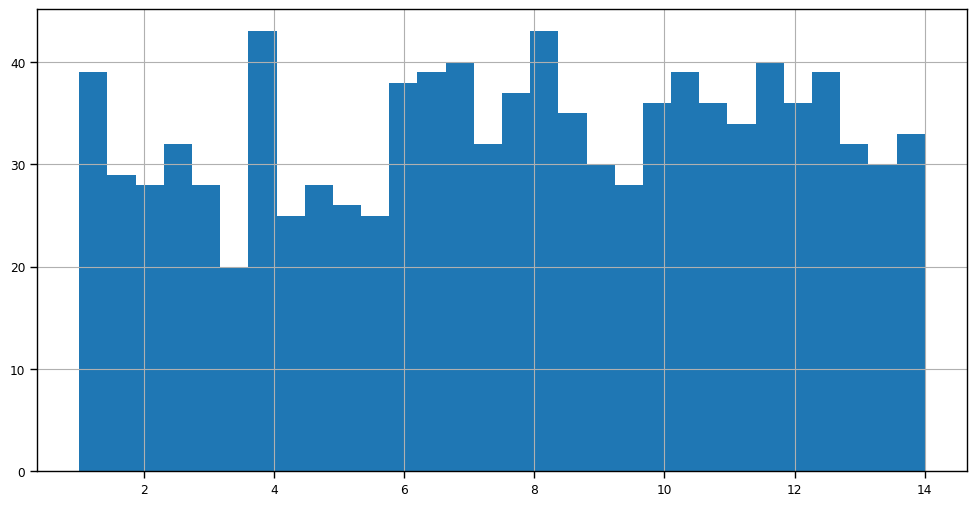

In [313]:
#Общее время, проведенное перед экраном
screenTime = np.array(df['Daily_Screen_Time_Hours'])
print('Общее время, проведенное перед экраном: ')
print('Среднее значение: ' + str(screenTime.mean()))
print('СКО: ' + str(screenTime.std()))
print('Количество пропущенных значений: ' + str(df['Daily_Screen_Time_Hours'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(screenTime)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Daily_Screen_Time_Hours'], bins = 30)
axes.grid()

Количество различных приложений, используемых пользователем за день:
Среднее значение: 16.647
СКО: 7.615798776228268
Количество пропущенных значений: 0
Выбросы: []


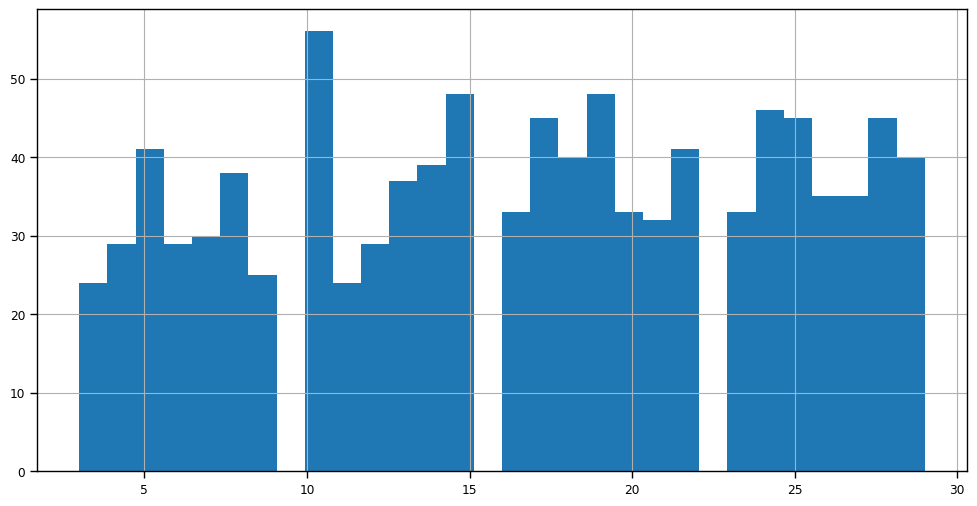

In [316]:
#Количество различных приложений, используемых пользователем за день
numApps = np.array(df['Number_of_Apps_Used'])
print('Количество различных приложений, используемых пользователем за день:')
print('Среднее значение: ' + str(numApps.mean()))
print('СКО: ' + str(numApps.std()))
print('Количество пропущенных значений: ' + str(df['Number_of_Apps_Used'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(numApps)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Number_of_Apps_Used'], bins = 30)
axes.grid()

Количество часов, посвященное приложениям социальных сетей:
Среднее значение: 2.45633
СКО: 1.4388052095749446
Количество пропущенных значений: 0
Выбросы: []


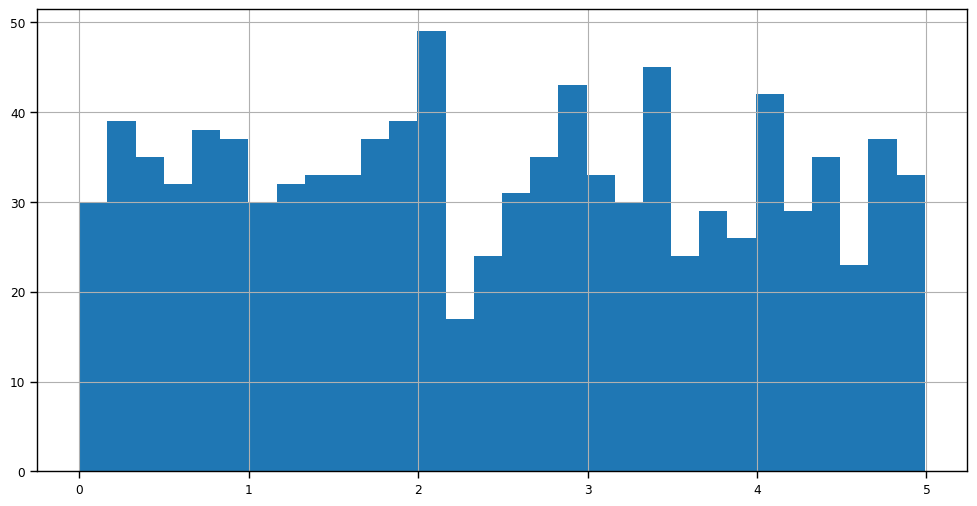

In [317]:
#Количество часов, посвященное приложениям социальных сетей
socMedia = np.array(df['Social_Media_Usage_Hours'])
print('Количество часов, посвященное приложениям социальных сетей:')
print('Среднее значение: ' + str(socMedia.mean()))
print('СКО: ' + str(socMedia.std()))
print('Количество пропущенных значений: ' + str(df['Social_Media_Usage_Hours'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(socMedia)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Social_Media_Usage_Hours'], bins = 30)
axes.grid()

Количество часов, посвященныое приложениям для повышения производительности:
Среднее значение: 2.4952699999999997
СКО: 1.4426706232193127
Количество пропущенных значений: 0
Выбросы: []


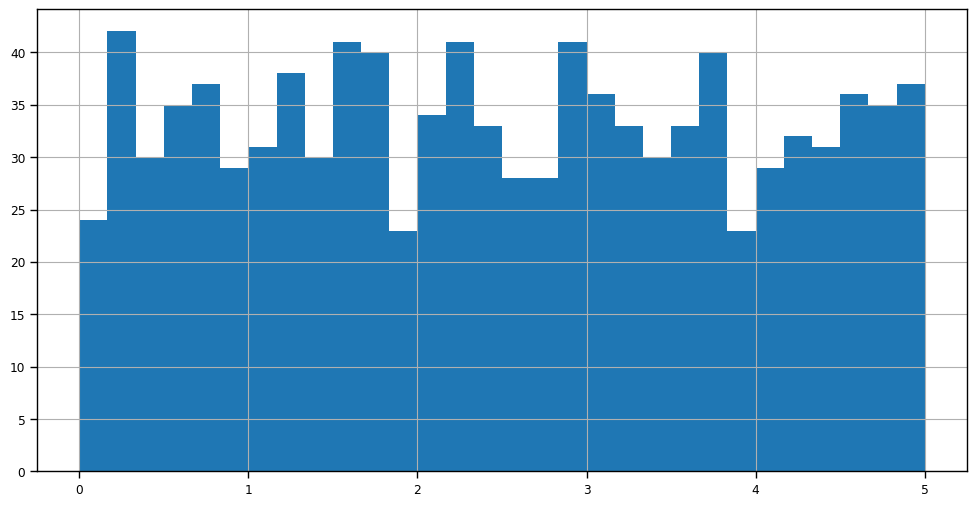

In [318]:
#Количество часов, посвященныое приложениям для повышения производительности
prodApp = np.array(df['Productivity_App_Usage_Hours'])
print('Количество часов, посвященныое приложениям для повышения производительности:')
print('Среднее значение: ' + str(prodApp.mean()))
print('СКО: ' + str(prodApp.std()))
print('Количество пропущенных значений: ' + str(df['Productivity_App_Usage_Hours'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(prodApp)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Productivity_App_Usage_Hours'], bins = 30)
axes.grid()

Количество часов, посвященное игровым приложениям: 
Среднее значение: 2.4754099999999997
СКО: 1.449636655131209
Количество пропущенных значений: 0
Выбросы: []


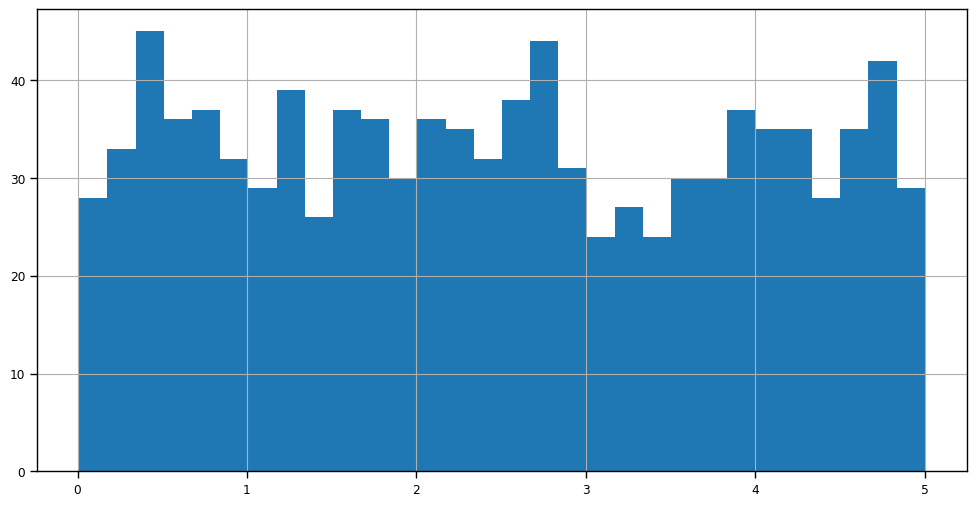

In [320]:
#Количество часов, посвященное игровым приложениям
gameApp = np.array(df['Gaming_App_Usage_Hours'])
print('Количество часов, посвященное игровым приложениям: ')
print('Среднее значение: ' + str(gameApp.mean()))
print('СКО: ' + str(gameApp.std()))
print('Количество пропущенных значений: ' + str(df['Gaming_App_Usage_Hours'].isna().sum()))
print('Выбросы: ' + str(FindOutliers(gameApp)))

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(df['Gaming_App_Usage_Hours'], bins = 30)
axes.grid()

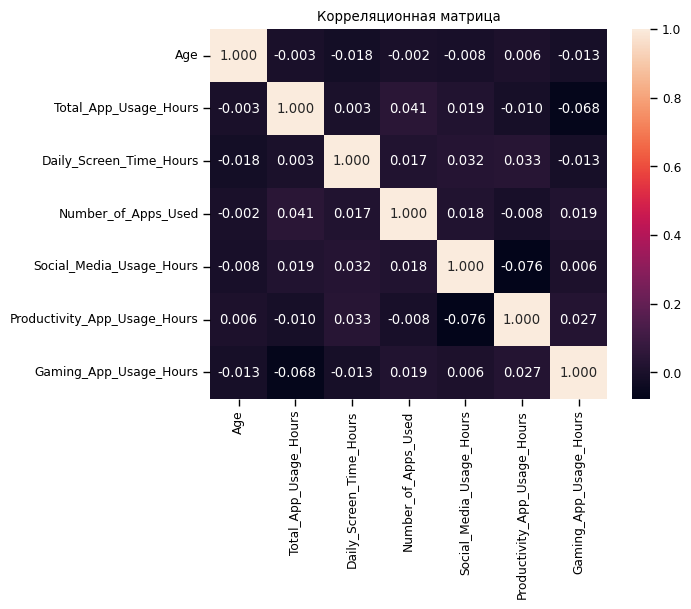

In [323]:
#Корреляционная матрица 
dfNum = df.select_dtypes(include='number')
sns.set_context('paper')
sns.heatmap(dfNum.corr(), annot=True, fmt='.3f')
plt.title('Корреляционная матрица')
plt.show()

Text(0, 0.5, 'Возраст пользователя')

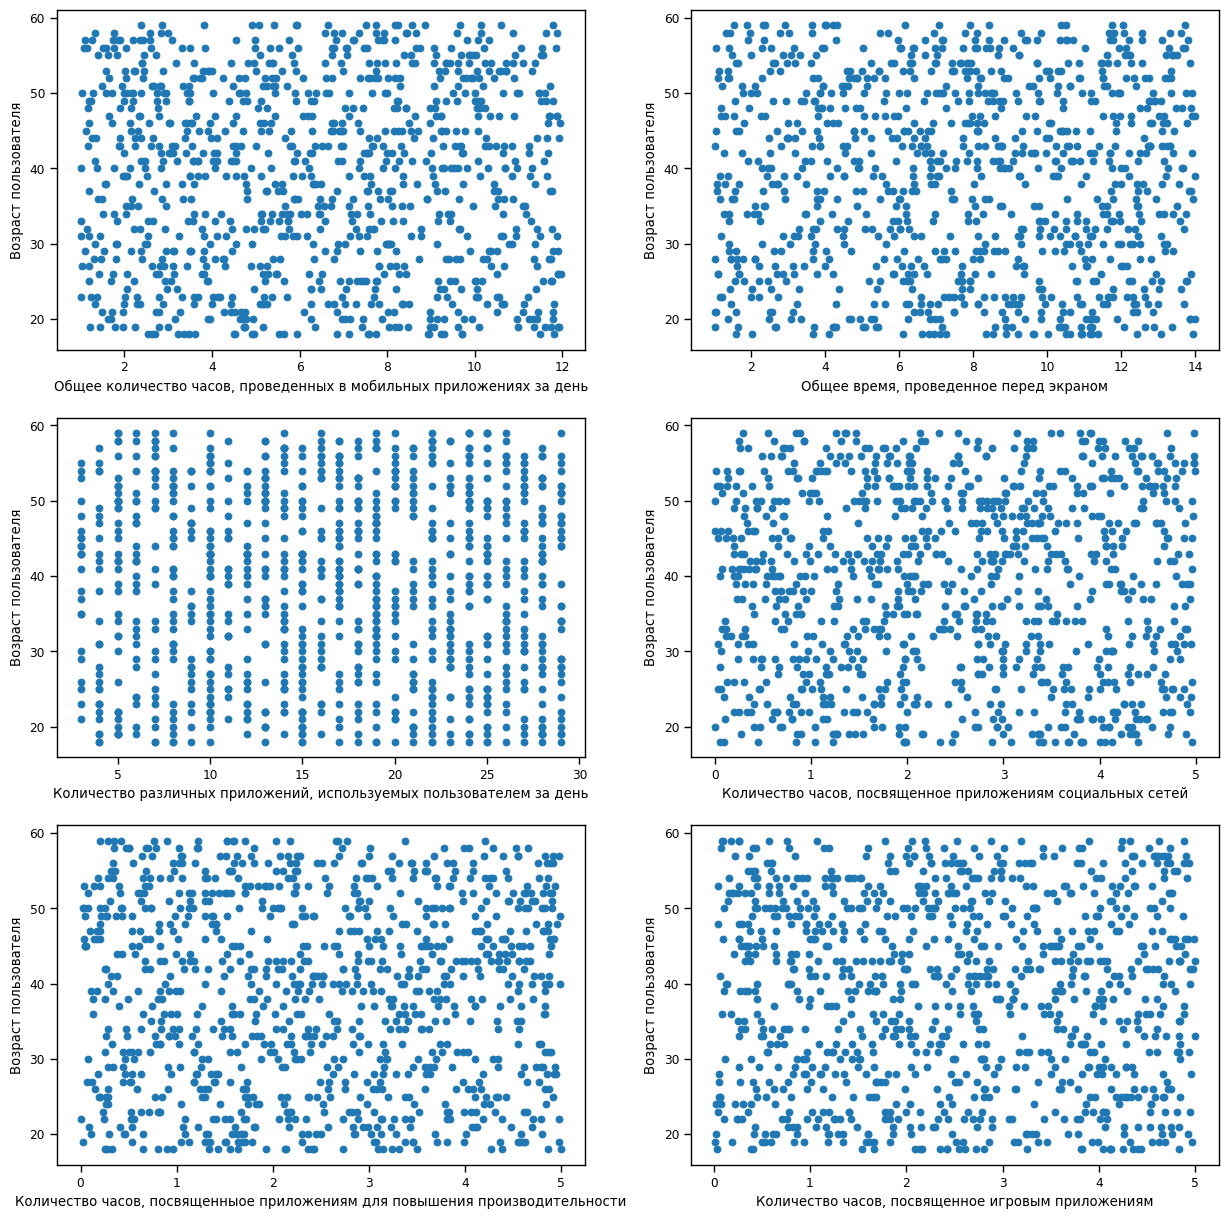

In [326]:
#Графики рассеивания всех величин от возраста пользователей
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

axes[0][0].scatter(df['Total_App_Usage_Hours'], df['Age'])
axes[0][0].set_xlabel('Общее количество часов, проведенных в мобильных приложениях за день')
axes[0][0].set_ylabel('Возраст пользователя')

axes[0][1].scatter(df['Daily_Screen_Time_Hours'], df['Age'])
axes[0][1].set_xlabel('Общее время, проведенное перед экраном')
axes[0][1].set_ylabel('Возраст пользователя')

axes[1][0].scatter(df['Number_of_Apps_Used'], df['Age'])
axes[1][0].set_xlabel('Количество различных приложений, используемых пользователем за день')
axes[1][0].set_ylabel('Возраст пользователя')

axes[1][1].scatter(df['Social_Media_Usage_Hours'], df['Age'])
axes[1][1].set_xlabel('Количество часов, посвященное приложениям социальных сетей')
axes[1][1].set_ylabel('Возраст пользователя')

axes[2][0].scatter(df['Productivity_App_Usage_Hours'], df['Age'])
axes[2][0].set_xlabel('Количество часов, посвященныое приложениям для повышения производительности')
axes[2][0].set_ylabel('Возраст пользователя')

axes[2][1].scatter(df['Gaming_App_Usage_Hours'], df['Age'])
axes[2][1].set_xlabel('Количество часов, посвященное игровым приложениям')
axes[2][1].set_ylabel('Возраст пользователя')